<a id="table"></a>
<h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Table of Contents</h1>

[1. Notebook Versions](#1)

[2. Loading Libraries](#2)

[3. Reading Data Files](#3)

[4. Data Description](#4)

[5. Data Exploration](#5)

[6. Baseline Modeling 1.0](#6)

[7. Baseline Modeling 2.0](#7)

<a id="1"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Notebook Versions</h1>

1. Version 1 (05/29/2023)
    * EDA 
    * Baseline modeling 1.0
    

2. Version 2 (05/29/2023)
    * Fixing bug
    
    
3. Version 3 (05/30/2023)
    * Data description added
    * Updating baseline modeling 1.0
    
    
4. Version 4 (06/01/2023)
    * Updating baseline modeling 1.0
    

5. Version 5 (06/08/2023)
    * Baseline modeling 2.0 added
    
    
6. Version 6 (06/09/2023)
    * Baseline modeling 2.0 updated

<a id="2"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Loading Libraries</h1>    

In [1]:
pip install scikit-lego

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 9.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Df的时候,不省略显示咧
import pandas as pd; pd.set_option('display.max_columns', 100)
#为了高效进行数值计算
import numpy as np
#显示进度的进度条
from tqdm.notebook import tqdm
#想绘制颜色柔和的图表
import matplotlib.pyplot as plt; plt.style.use('ggplot')
#可以绘制精致的图,与matplotlib相比,用更少的代码即可绘制图表
import seaborn as sns
#基于JavaScript进行动态绘图
import plotly.express as px
#回归决策树
from sklearn.tree import DecisionTreeRegressor, plot_tree
#前处理是指数据的缺失填补、规范化以及分类数据的数值化
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
#拥有 .fit() 方法的一系列对象
from sklearn.pipeline import make_pipeline
#回归用于预测销售等数量（取连续值的目标变量），非常有用
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
#在机器学习中，将数据划分为训练集（学习集）和测试集，用于进行留出验证
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV, RepeatedKFold, RepeatedStratifiedKFold
#分类问题的结果是以“实际类别”和“预测类别”为轴进行汇总的
from sklearn.metrics import mean_squared_error, mean_absolute_error
#可视化特征量与目标变量之间的关系
from sklearn.inspection import PartialDependenceDisplay
#多数投票集成分类器
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, GradientBoostingRegressor, ExtraTreesRegressor
#为了对数据进行分类并绘制边界线
from sklearn.svm import SVR
#决策树
from lightgbm import LGBMRegressor
#决策树ー精度高，但处理时间长。
from xgboost import XGBRegressor
#对分类变量进行更高级处理的算法。
from catboost import CatBoostRegressor
#乐高制作的lego
from sklego.linear_model import LADRegression

<a id="3"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Reading Data Files</h1> 

In [3]:
train = pd.read_csv('../input/playground-series-s3e16/train.csv')
test = pd.read_csv('../input/playground-series-s3e16/test.csv')
original = pd.read_csv('../input/crab-age-prediction/CrabAgePrediction.csv')
submission = pd.read_csv('../input/playground-series-s3e16/sample_submission.csv')

print('The dimension of the train synthetic dataset is:', train.shape)
print('The dimension of the test synthetic dataset is:', test.shape)
print('The dimension of the orginal dataset is:', original.shape)
print('The dimension of the submission dataset is:', submission.shape)

The dimension of the train synthetic dataset is: (74051, 10)
The dimension of the test synthetic dataset is: (49368, 9)
The dimension of the orginal dataset is: (3893, 9)
The dimension of the submission dataset is: (49368, 2)


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


In [5]:
train.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [6]:
train.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,37025.000000,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,21376.826729,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,18512.500000,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,37025.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,55537.500000,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,74050.000000,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [7]:
original.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [8]:
original.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


> <div class="alert alert-block alert-info">
<b>💡</b> There are no missing values neither in the competition nor the original dataset. Also, by a quick eye-ball comparison of the summary statistics of the train and test datasets, they seem to have similar distributions. 
</div>

<a id="4"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Data Description</h1>

This is a synthetic dataset generated from the [Crab Age Prediction](https://www.kaggle.com/datasets/sidhus/crab-age-prediction) dataset. These are the descriptions of the variables in this dataset:

<ul>
<li> Sex: Gender of the Crab - Male, Female and Indeterminate </li>
<li> Length: Length of the Crab in feet </li>
<li> Diameter: Diameter of the Crab in feet </li>
<li> Height: Height of the Crab in feet </li>
<li> Weight: Weight of the Crab in ounces </li>
<li> Shucked Weight: Weight without the shell in ounces </li>
<li> Viscera Weight: Weight that wraps around the crab's abdominal organs in ounces </li>
<li> Shell Weight: Weight of the Shell in ounces </li>
<li> Age: Age of the Crab in months</li>


<a id="5"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Data Exploration</h1>

First, we start by visualizing the variable of interest.

这个图表展示了年龄与身高和体重的比较。大多数比较使用了 Seaborn。数据处理是在其他地方进行的，这里只展示了图表。

核密度估计图（hé mìdù gūjì tú）这个图形常用于统计分析中，用来直观地了解数据的分布形态。

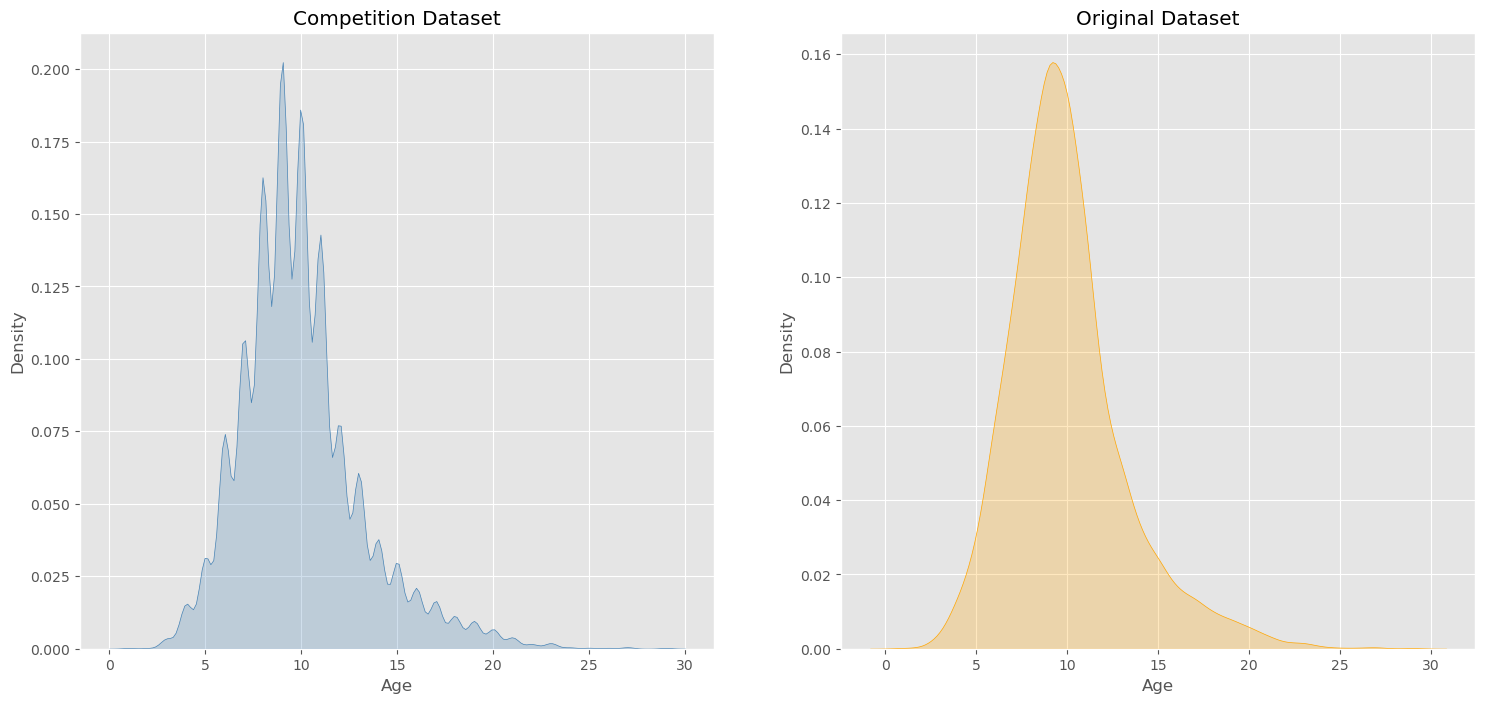

In [9]:
fig, axes = plt.subplots(1, 2, figsize = (18, 8))

sns.kdeplot(ax = axes[0], data = train, x = 'Age', fill = True, color = 'steelblue').set_title('Competition Dataset');
sns.kdeplot(ax = axes[1], data = original, x = 'Age', fill = True, color = 'orange').set_title('Original Dataset');

将两个比较归一化为0到1之间的比较。seboon

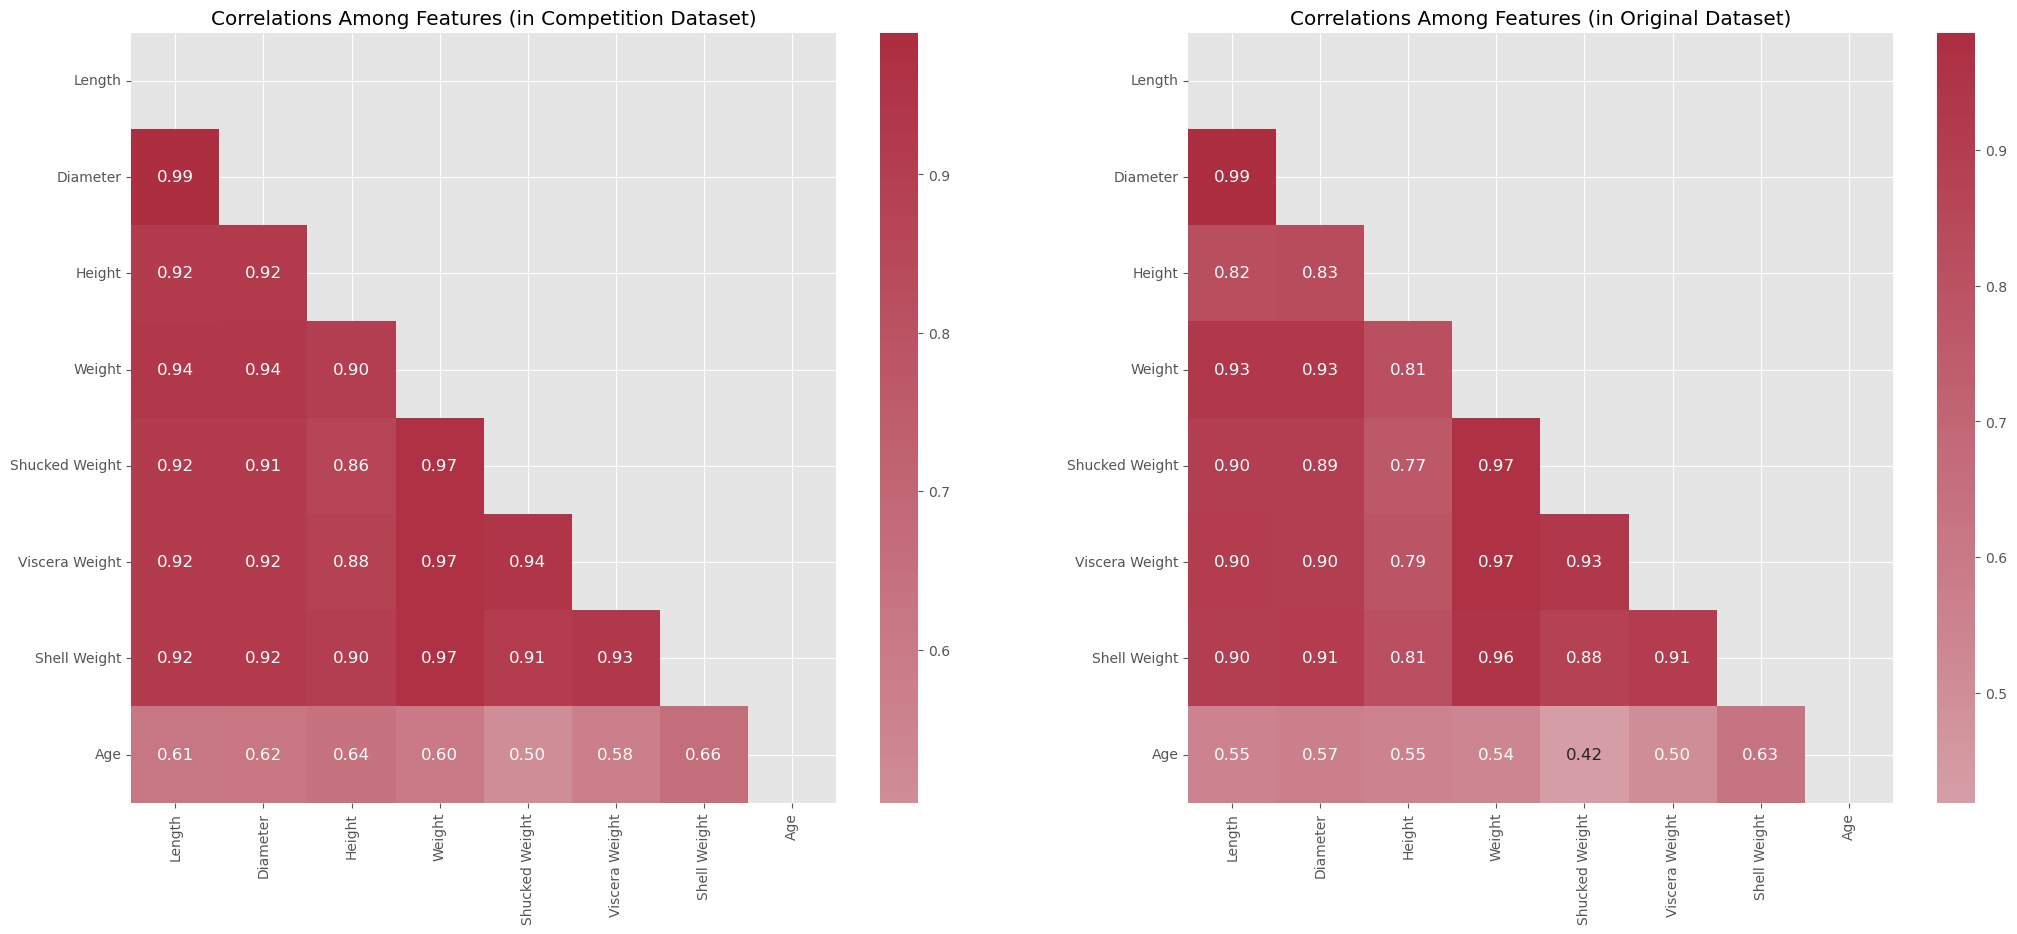

In [10]:
corr_mat_data = train.drop(columns = ['id', 'Sex'], axis = 1).corr()
corr_mat_original = original.drop(columns = ['Sex'], axis = 1).corr()

data_mask = np.triu(np.ones_like(corr_mat_data, dtype = bool))
original_mask = np.triu(np.ones_like(corr_mat_original, dtype = bool))

cmap = sns.diverging_palette(100, 7, s = 75, l = 40, n = 20, center = 'light', as_cmap = True)

fig, axes = plt.subplots(1, 2, figsize = (25, 10))
sns.heatmap(corr_mat_data, annot = True, cmap = cmap, fmt = '.2f', center = 0,
            annot_kws = {'size': 12}, ax = axes[0], mask = data_mask).set_title('Correlations Among Features (in Competition Dataset)')
sns.heatmap(corr_mat_original, annot = True, cmap = cmap, fmt = '.2f', center = 0,
            annot_kws = {'size': 12}, ax = axes[1], mask = original_mask).set_title('Correlations Among Features (in Original Dataset)');

From the above, the correlations among the features and the target variable are similar in the competition and original dataset. Also, we see that `Shell Weight` is the feature that correlate the most with `Age`. On the other hand, `Shucked Weight` is the feature that correlate the least with `Age`. Next, we check for duplicates.

从上述结果来看，特征与目标变量之间的相关性在竞赛数据集和原始数据集中是相似的。此外，我们发现 Shell Weight 是与 Age 相关性最强的特征，而 Shucked Weight 是与 Age 相关性最弱的特征。接下来，我们检查重复数据。

In [11]:
print('There are ', train.shape[0], 'observations in the train competition dataset')
print('There are ', train.drop(columns = ['id'], axis = 1).drop_duplicates().shape[0], 'unique observations in the train competition dataset')
print('There are ', train.drop(columns = ['id', 'Age'], axis = 1).drop_duplicates().shape[0], 'unique observations (only features) in the train competition dataset')

There are  74051 observations in the train competition dataset
There are  74051 unique observations in the train competition dataset
There are  74051 unique observations (only features) in the train competition dataset


In [12]:
print('There are ', test.shape[0], 'observations in the test competition dataset')
print('There are ', test.drop(columns = ['id'], axis = 1).drop_duplicates().shape[0], 'unique observations in the test competition dataset')

There are  49368 observations in the test competition dataset
There are  49368 unique observations in the test competition dataset


In [13]:
print('There are ', original.shape[0], 'observations in the original dataset')
print('There are ', original.drop_duplicates().shape[0], 'unique observations in the original dataset')

There are  3893 observations in the original dataset
There are  3893 unique observations in the original dataset


There are no duplicates in the datasets. Next, we explore the relationshio between `Sex` and `Age`.


查看数据的变异性时，使用此图表。

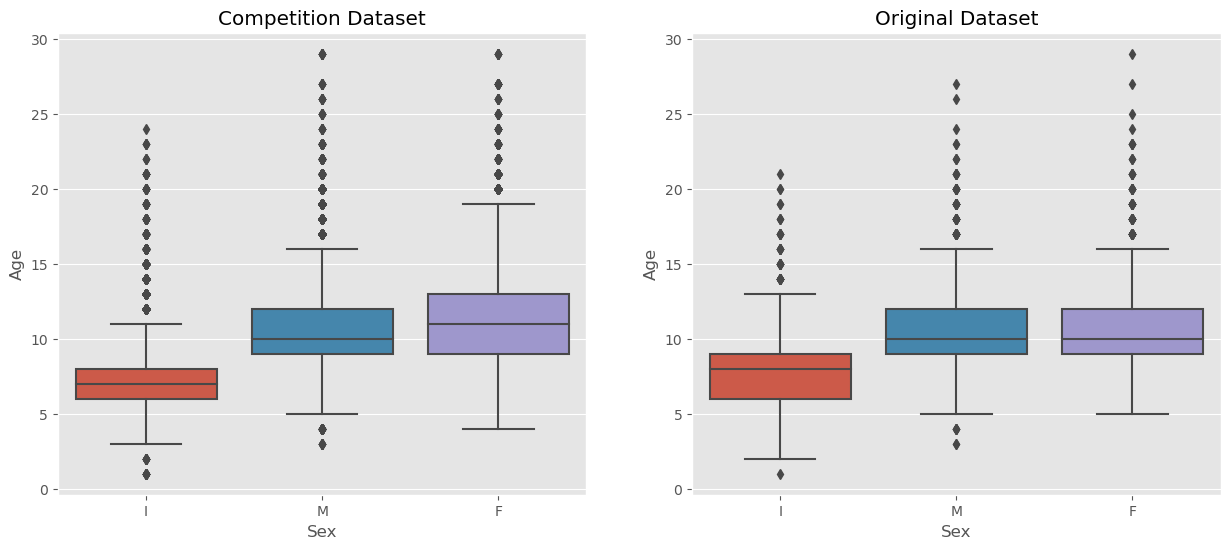

In [14]:
original['Sex'] = pd.Categorical(original['Sex'], categories = ['I', 'M', 'F'], ordered = True)

#使用子图可以同时显示两个图表。
fig, axes = plt.subplots(1, 2, figsize = (15, 6))

sns.boxplot(ax = axes[0], data = train, x = 'Sex', y = 'Age').set_title('Competition Dataset')
sns.boxplot(ax = axes[1], data = original, x = 'Sex', y = 'Age').set_title('Original Dataset');

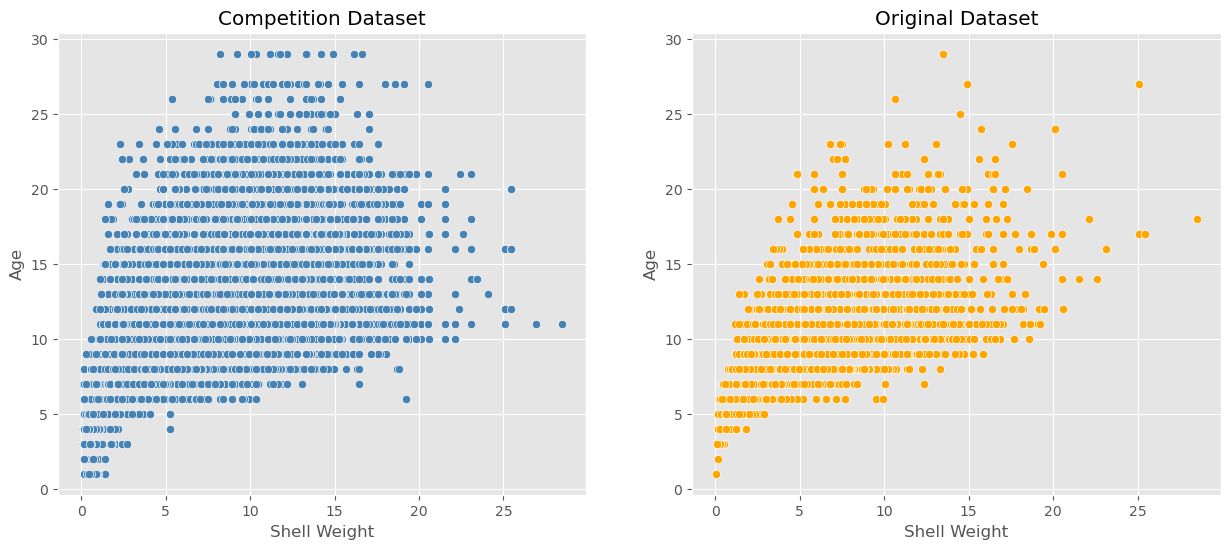

In [15]:
fig, axes = plt.subplots(1, 2, figsize = (15, 6))
#年龄与体重的对比图
sns.scatterplot(ax = axes[0], data = train, x = 'Shell Weight', y = 'Age', color = 'steelblue').set_title('Competition Dataset')
sns.scatterplot(ax = axes[1], data = original, x = 'Shell Weight', y = 'Age', color = 'orange').set_title('Original Dataset');

From the above plots, we see that the relationship between `Shell Weight` and `Age` is similar in the comp and original datasets.

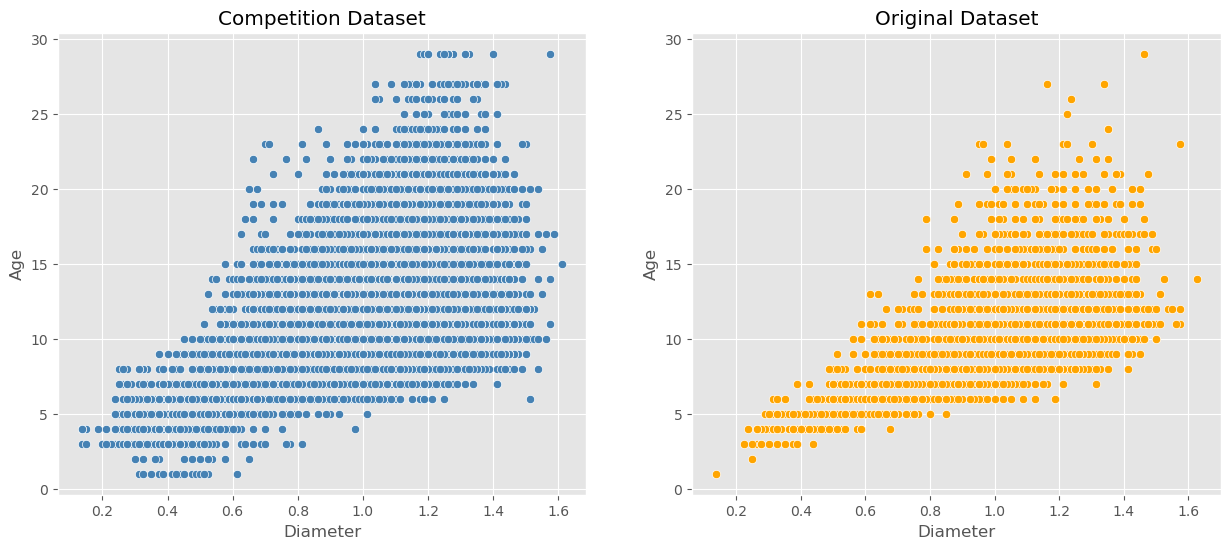

In [16]:
fig, axes = plt.subplots(1, 2, figsize = (15, 6))
#年齢与直径的对比图
sns.scatterplot(ax = axes[0], data = train, x = 'Diameter', y = 'Age', color = 'steelblue').set_title('Competition Dataset')
sns.scatterplot(ax = axes[1], data = original, x = 'Diameter', y = 'Age', color = 'orange').set_title('Original Dataset');

From the above, the relationship between `Diameter` and `Age` looks linear.

<a id="6"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Baseline Modeling 1.0</h1>

First, we consolidate the `train` and `original` datasets as follows:

In [17]:
le = LabelEncoder()

train['generated'] = 1
original['generated'] = 0
test['generated'] = 1

train.drop(columns = 'id', axis = 1, inplace = True)

train = pd.concat([train, original], axis = 0).reset_index(drop = True)
train['Sex'] = le.fit_transform(train['Sex'])

Next we proceed to build a couple of baseline models as shown below. Also, we ensemble the baseline model predictions using least absolute deviation regression.

In [18]:
X = train.drop(columns = ['Age'], axis = 1)
Y = train['Age']

test_baseline = test.drop(columns = ['id'], axis = 1)
test_baseline['Sex'] = le.transform(test_baseline['Sex'])

gb_cv_scores, gb_preds = list(), list()
hist_cv_scores, hist_preds = list(), list()
lgb_cv_scores, lgb_preds = list(), list()
xgb_cv_scores, xgb_preds = list(), list()
ens_cv_scores, ens_preds = list(), list()

skf = KFold(n_splits = 10, random_state = 42, shuffle = True)
    
for i, (train_ix, test_ix) in enumerate(skf.split(X, Y)):
        
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]
    
    print('---------------------------------------------------------------')
    
    ######################
    ## GradientBoosting ##
    ######################
        
    gb_md = GradientBoostingRegressor(loss = 'absolute_error',
                                      n_estimators = 1000, 
                                      max_depth = 8, 
                                      learning_rate = 0.01,
                                      min_samples_split = 10, 
                                      min_samples_leaf = 20).fit(X_train, Y_train) 
    
    gb_pred_1 = gb_md.predict(X_test[X_test['generated'] == 1])
    gb_pred_2 = gb_md.predict(test_baseline)
            
    gb_score_fold = mean_absolute_error(Y_test[X_test['generated'] == 1], gb_pred_1)
    gb_cv_scores.append(gb_score_fold)
    gb_preds.append(gb_pred_2)
    
    print('Fold', i, '==> GradientBoositng oof MAE is ==>', gb_score_fold)
    
    
    ##########################
    ## HistGradientBoosting ##
    ##########################
        
    hist_md = HistGradientBoostingRegressor(loss = 'absolute_error',
                                            l2_regularization = 0.01,
                                            early_stopping = False,
                                            learning_rate = 0.01,
                                            max_iter = 1000,
                                            max_depth = 15,
                                            max_bins = 255,
                                            min_samples_leaf = 70,
                                            max_leaf_nodes = 115).fit(X_train, Y_train)
    
    hist_pred_1 = hist_md.predict(X_test[X_test['generated'] == 1])
    hist_pred_2 = hist_md.predict(test_baseline)

    hist_score_fold = mean_absolute_error(Y_test[X_test['generated'] == 1], hist_pred_1)
    hist_cv_scores.append(hist_score_fold)
    hist_preds.append(hist_pred_2)
    
    print('Fold', i, '==> HistGradient oof MAE is ==>', hist_score_fold)
        
    ##############
    ## LightGBM ##
    ##############
        
    lgb_md = LGBMRegressor(objective = 'mae', 
                           n_estimators = 1000,
                           max_depth = 15,
                           learning_rate = 0.01,
                           num_leaves = 105,
                           reg_alpha = 8,
                           reg_lambda = 3,
                           subsample = 0.6,
                           colsample_bytree = 0.8,
                           device = 'gpu').fit(X_train, Y_train)
    
    lgb_pred_1 = lgb_md.predict(X_test[X_test['generated'] == 1])
    lgb_pred_2 = lgb_md.predict(test_baseline)

    lgb_score_fold = mean_absolute_error(Y_test[X_test['generated'] == 1], lgb_pred_1)    
    lgb_cv_scores.append(lgb_score_fold)
    lgb_preds.append(lgb_pred_2)
    
    print('Fold', i, '==> LightGBM oof MAE is ==>', lgb_score_fold)
        
    #############
    ## XGBoost ##
    #############
        
    xgb_md = XGBRegressor(objective = 'reg:pseudohubererror',
                          tree_method = 'gpu_hist',
                          colsample_bytree = 0.9, 
                          gamma = 0.65, 
                          learning_rate = 0.01, 
                          max_depth = 7, 
                          min_child_weight = 20, 
                          n_estimators = 1000, 
                          subsample = 0.7).fit(X_train, Y_train)
    
    xgb_pred_1 = xgb_md.predict(X_test[X_test['generated'] == 1])
    xgb_pred_2 = xgb_md.predict(test_baseline)

    xgb_score_fold = mean_absolute_error(Y_test[X_test['generated'] == 1], xgb_pred_1)    
    xgb_cv_scores.append(xgb_score_fold)
    xgb_preds.append(xgb_pred_2)
    
    print('Fold', i, '==> XGBoost oof MAE is ==>', xgb_score_fold)
    
    ##################
    ## LAD Ensemble ##
    ##################
    
    x = pd.DataFrame({'GBC':gb_pred_1,  'hist': hist_pred_1, 'lgb': lgb_pred_1, 'xgb': xgb_pred_1})
    y = Y_test[X_test['generated'] == 1]
    
    lad_md = LADRegression().fit(x, y)
    lad_pred = lad_md.predict(x)
    
    x_test = pd.DataFrame({'GBC':gb_pred_2,  'hist': hist_pred_2, 'lgb': lgb_pred_2, 'xgb': xgb_pred_2})
    lad_pred_test = lad_md.predict(x_test)
        
    ens_score = mean_absolute_error(y, lad_pred)
    ens_cv_scores.append(ens_score)
    ens_preds.append(lad_pred_test)
    
    print('Fold', i, '==> LAD ensemble oof MAE is ==>', ens_score)

---------------------------------------------------------------
Fold 0 ==> GradientBoositng oof MAE is ==> 1.359125397755946
Fold 0 ==> HistGradient oof MAE is ==> 1.3613121219042987


1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.


Fold 0 ==> LightGBM oof MAE is ==> 1.3571383830419057
Fold 0 ==> XGBoost oof MAE is ==> 1.3647937149636715
Fold 0 ==> LAD ensemble oof MAE is ==> 1.3556770528434594
---------------------------------------------------------------
Fold 1 ==> GradientBoositng oof MAE is ==> 1.3580158565535052
Fold 1 ==> HistGradient oof MAE is ==> 1.3565219781539615
Fold 1 ==> LightGBM oof MAE is ==> 1.3551844603923613
Fold 1 ==> XGBoost oof MAE is ==> 1.361177522014698
Fold 1 ==> LAD ensemble oof MAE is ==> 1.3528842877381062
---------------------------------------------------------------
Fold 2 ==> GradientBoositng oof MAE is ==> 1.3553890678979903
Fold 2 ==> HistGradient oof MAE is ==> 1.358916513114261
Fold 2 ==> LightGBM oof MAE is ==> 1.353935739356728
Fold 2 ==> XGBoost oof MAE is ==> 1.3651066119548356
Fold 2 ==> LAD ensemble oof MAE is ==> 1.3525544897247794
---------------------------------------------------------------
Fold 3 ==> GradientBoositng oof MAE is ==> 1.3479872032581255
Fold 3 ==> His

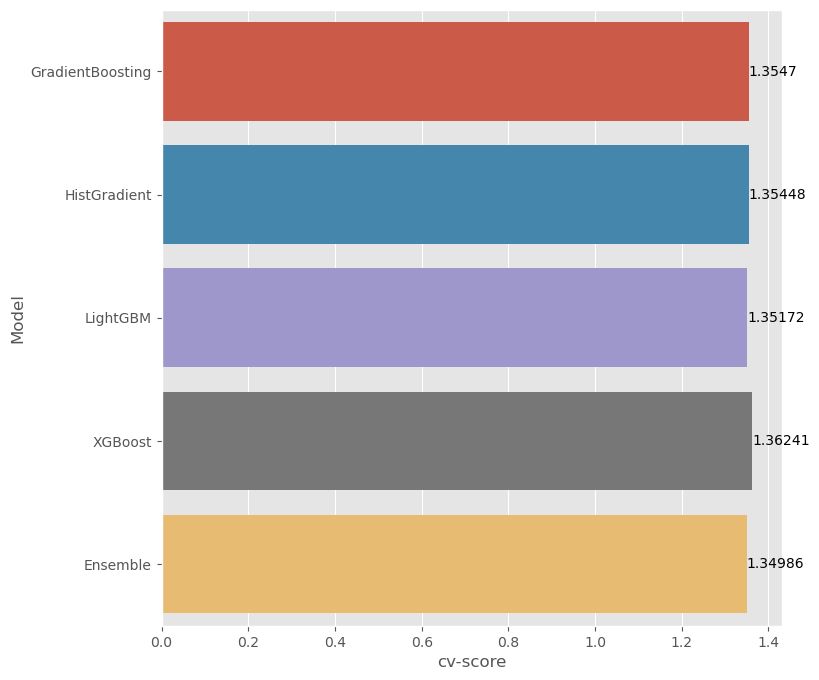

In [19]:
gb_cv_score = np.mean(gb_cv_scores)
hist_cv_score = np.mean(hist_cv_scores)
lgb_cv_score = np.mean(lgb_cv_scores)
xgb_cv_score = np.mean(xgb_cv_scores)
ens_cv_score = np.mean(ens_cv_scores)

model_perf = pd.DataFrame({'Model': ['GradientBoosting', 'HistGradient' ,'LightGBM', 'XGBoost', 'Ensemble'],
                           'cv-score': [gb_cv_score, hist_cv_score, lgb_cv_score, xgb_cv_score, ens_cv_score]})

plt.figure(figsize = (8, 8))
ax = sns.barplot(y = 'Model', x = 'cv-score', data = model_perf)
ax.bar_label(ax.containers[0]);

In [20]:
gb_preds_test = pd.DataFrame(gb_preds).apply(np.mean, axis = 0)
hist_preds_test = pd.DataFrame(hist_preds).apply(np.mean, axis = 0)
lgb_preds_test = pd.DataFrame(lgb_preds).apply(np.mean, axis = 0)
xgb_preds_test = pd.DataFrame(xgb_preds).apply(np.mean, axis = 0)
ens_preds_test = pd.DataFrame(ens_preds).apply(np.mean, axis = 0)

submission['Age'] = round(gb_preds_test).astype(int)
submission.to_csv('GB_Baseline_submission.csv', index = False)

submission['Age'] = round(hist_preds_test).astype(int)
submission.to_csv('Hist_Baseline_submission.csv', index = False)

submission['Age'] = round(lgb_preds_test).astype(int)
submission.to_csv('LightGBM_Baseline_submission.csv', index = False)

submission['Age'] = round(xgb_preds_test).astype(int)
submission.to_csv('XGBoost_Baseline_submission.csv', index = False)

submission['Age'] = round(ens_preds_test).astype(int)
submission.to_csv('LAD_Ensemble_Baseline_submission.csv', index = False)

<a id="7"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Baseline Modeling 2.0</h1>

In this section, we improve baseline modeling 1.0 by adding a couple of engineered features and `CatBoost`. Notice that, a couple of the suggested engineered features from this [post](https://www.kaggle.com/competitions/playground-series-s3e16/discussion/415721).

In [21]:
X = train.drop(columns = ['Age'], axis = 1)
Y = train['Age']

X['Meat Yield'] = X['Shucked Weight'] / (X['Weight'] + X['Shell Weight'])
X['Shell Ratio'] = X['Shell Weight'] / X['Weight']
X['Weight_to_Shucked_Weight'] = X['Weight'] / X['Shucked Weight']
X['Viscera Ratio'] = X['Viscera Weight'] / X['Weight']

test_baseline = test.drop(columns = ['id'], axis = 1)

test_baseline['Sex'] = le.transform(test_baseline['Sex'])
test_baseline['Meat Yield'] = test_baseline['Shucked Weight'] / (test_baseline['Weight'] + test_baseline['Shell Weight'])
test_baseline['Shell Ratio'] = test_baseline['Shell Weight'] / test_baseline['Weight']
test_baseline['Weight_to_Shucked_Weight'] = test_baseline['Weight'] / test_baseline['Shucked Weight']
test_baseline['Viscera Ratio'] = test_baseline['Viscera Weight'] / test_baseline['Weight']

aml_cv_scores, aml_preds = list(), list()
gb_cv_scores, gb_preds = list(), list()
hist_cv_scores, hist_preds = list(), list()
lgb_cv_scores, lgb_preds = list(), list()
xgb_cv_scores, xgb_preds = list(), list()
cat_cv_scores, cat_preds = list(), list()
ens_cv_scores_1, ens_preds_1 = list(), list()
ens_cv_scores_2, ens_preds_2 = list(), list()
ens_cv_scores_3, ens_preds_3 = list(), list()
ens_cv_scores_4, ens_preds_4 = list(), list()

skf = KFold(n_splits = 10, random_state = 42, shuffle = True)
    
for i, (train_ix, test_ix) in enumerate(skf.split(X, Y)):
        
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]
    
    print('---------------------------------------------------------------')
    
    ######################
    ## GradientBoosting ##
    ######################
    
    gb_features = ['Sex',
                   'Length',
                   'Diameter',
                   'Height',
                   'Weight',
                   'Shucked Weight',
                   'Viscera Weight',
                   'Shell Weight',
                   'generated']
    
    X_train_gb = X_train[gb_features]
    X_test_gb = X_test[gb_features]
    test_baseline_gb = test_baseline[gb_features]
    
    gb_md = GradientBoostingRegressor(loss = 'absolute_error',
                                      n_estimators = 1000, 
                                      max_depth = 8, 
                                      learning_rate = 0.01,
                                      min_samples_split = 10, 
                                      min_samples_leaf = 20,
                                      random_state = 42).fit(X_train_gb, Y_train) 
    
    gb_pred_1 = gb_md.predict(X_test_gb[X_test_gb['generated'] == 1])
    gb_pred_2 = gb_md.predict(test_baseline_gb)
            
    gb_score_fold = mean_absolute_error(Y_test[X_test_gb['generated'] == 1], gb_pred_1)
    gb_cv_scores.append(gb_score_fold)
    gb_preds.append(gb_pred_2)
    
    print('Fold', i, '==> GradientBoositng oof MAE is ==>', gb_score_fold)
    
    
    ##########################
    ## HistGradientBoosting ##
    ##########################
        
    hist_md = HistGradientBoostingRegressor(loss = 'absolute_error',
                                            l2_regularization = 0.01,
                                            early_stopping = False,
                                            learning_rate = 0.01,
                                            max_iter = 1000,
                                            max_depth = 15,
                                            max_bins = 255,
                                            min_samples_leaf = 70,
                                            max_leaf_nodes = 115,
                                            random_state = 42).fit(X_train, Y_train) 
    
    hist_pred_1 = hist_md.predict(X_test[X_test['generated'] == 1])
    hist_pred_2 = hist_md.predict(test_baseline)

    hist_score_fold = mean_absolute_error(Y_test[X_test['generated'] == 1], hist_pred_1)
    hist_cv_scores.append(hist_score_fold)
    hist_preds.append(hist_pred_2)
    
    print('Fold', i, '==> HistGradient oof MAE is ==>', hist_score_fold)
        
    ##############
    ## LightGBM ##
    ##############
        
    lgb_md = LGBMRegressor(objective = 'mae', 
                           n_estimators = 1000,
                           max_depth = 15,
                           learning_rate = 0.01,
                           num_leaves = 105, 
                           reg_alpha = 8, 
                           reg_lambda = 3, 
                           subsample = 0.6, 
                           colsample_bytree = 0.8,
                           random_state = 42).fit(X_train, Y_train)
    
    lgb_pred_1 = lgb_md.predict(X_test[X_test['generated'] == 1])
    lgb_pred_2 = lgb_md.predict(test_baseline)

    lgb_score_fold = mean_absolute_error(Y_test[X_test['generated'] == 1], lgb_pred_1)    
    lgb_cv_scores.append(lgb_score_fold)
    lgb_preds.append(lgb_pred_2)
    
    print('Fold', i, '==> LightGBM oof MAE is ==>', lgb_score_fold)
        
    #############
    ## XGBoost ##
    #############
    
    xgb_md = XGBRegressor(objective = 'reg:pseudohubererror',
                          tree_method = 'hist',
                          colsample_bytree = 0.9, 
                          gamma = 0.65, 
                          learning_rate = 0.01, 
                          max_depth = 7, 
                          min_child_weight = 20, 
                          n_estimators = 1500,
                          subsample = 0.7,
                          random_state = 42).fit(X_train_gb, Y_train) 
    
    xgb_pred_1 = xgb_md.predict(X_test_gb[X_test_gb['generated'] == 1])
    xgb_pred_2 = xgb_md.predict(test_baseline_gb)

    xgb_score_fold = mean_absolute_error(Y_test[X_test_gb['generated'] == 1], xgb_pred_1)    
    xgb_cv_scores.append(xgb_score_fold)
    xgb_preds.append(xgb_pred_2)
    
    print('Fold', i, '==> XGBoost oof MAE is ==>', xgb_score_fold)
    
    ##############
    ## CatBoost ##
    ##############
    
    cat_features = ['Sex',
                    'Length',
                    'Diameter',
                    'Height',
                    'Weight',
                    'Shucked Weight',
                    'Viscera Weight',
                    'Shell Weight',
                    'generated',
                    'Meat Yield',
                    'Shell Ratio',
                    'Weight_to_Shucked_Weight']
    
    X_train_cat = X_train[cat_features]
    X_test_cat = X_test[cat_features]
    test_baseline_cat = test_baseline[cat_features]
    
    cat_md = CatBoostRegressor(loss_function = 'MAE',
                               iterations = 1000,
                               learning_rate = 0.08,
                               depth = 10, 
                               random_strength = 0.2,
                               bagging_temperature = 0.7,
                               border_count = 254,
                               l2_leaf_reg = 0.001,
                               verbose = False,
                               grow_policy = 'Lossguide',
                               task_type = 'CPU',
                               random_state = 42).fit(X_train_cat, Y_train)
    
    cat_pred_1 = cat_md.predict(X_test_cat[X_test_cat['generated'] == 1])
    cat_pred_2 = cat_md.predict(test_baseline_cat)

    cat_score_fold = mean_absolute_error(Y_test[X_test_cat['generated'] == 1], cat_pred_1)    
    cat_cv_scores.append(cat_score_fold)
    cat_preds.append(cat_pred_2)
    
    print('Fold', i, '==> CatBoost oof MAE is ==>', cat_score_fold)

    
    ##################
    ## LAD Ensemble ##
    ##################
    
    x = pd.DataFrame({'GBC': np.round(gb_pred_1.tolist()),  'hist': np.round(hist_pred_1.tolist()), 
                      'lgb': np.round(lgb_pred_1.tolist()), 'xgb': np.round(xgb_pred_1.tolist()), 
                      'cat': np.round(cat_pred_1.tolist())})
    y = Y_test[X_test['generated'] == 1]
    
    x_test = pd.DataFrame({'GBC': np.round(gb_pred_2.tolist()),  'hist': np.round(hist_pred_2.tolist()), 
                           'lgb': np.round(lgb_pred_2.tolist()), 'xgb': np.round(xgb_pred_2.tolist()), 
                           'cat': np.round(cat_pred_2.tolist())})
    
    lad_md_1 = LADRegression(fit_intercept = True, positive = False).fit(x, y)
    lad_md_2 = LADRegression(fit_intercept = True, positive = True).fit(x, y)
    lad_md_3 = LADRegression(fit_intercept = False, positive = True).fit(x, y)
    lad_md_4 = LADRegression(fit_intercept = False, positive = False).fit(x, y)
    
    lad_pred_1 = lad_md_1.predict(x)
    lad_pred_2 = lad_md_2.predict(x)
    lad_pred_3 = lad_md_3.predict(x)
    lad_pred_4 = lad_md_4.predict(x)
    
    lad_pred_test_1 = lad_md_1.predict(x_test)
    lad_pred_test_2 = lad_md_2.predict(x_test)
    lad_pred_test_3 = lad_md_3.predict(x_test)
    lad_pred_test_4 = lad_md_4.predict(x_test)
        
    ens_score_1 = mean_absolute_error(y, lad_pred_1)
    ens_cv_scores_1.append(ens_score_1)
    ens_preds_1.append(lad_pred_test_1)
    
    ens_score_2 = mean_absolute_error(y, lad_pred_2)
    ens_cv_scores_2.append(ens_score_2)
    ens_preds_2.append(lad_pred_test_2)
    
    ens_score_3 = mean_absolute_error(y, lad_pred_3)
    ens_cv_scores_3.append(ens_score_3)
    ens_preds_3.append(lad_pred_test_3)
    
    ens_score_4 = mean_absolute_error(y, lad_pred_4)
    ens_cv_scores_4.append(ens_score_4)
    ens_preds_4.append(lad_pred_test_4)
    
    print('Fold', i, '==> LAD Model 1 ensemble oof MAE is ==>', ens_score_1)
    print('Fold', i, '==> LAD Model 2 ensemble oof MAE is ==>', ens_score_2)
    print('Fold', i, '==> LAD Model 3 ensemble oof MAE is ==>', ens_score_3)
    print('Fold', i, '==> LAD Model 4 ensemble oof MAE is ==>', ens_score_4)

---------------------------------------------------------------
Fold 0 ==> GradientBoositng oof MAE is ==> 1.3600831902284967
Fold 0 ==> HistGradient oof MAE is ==> 1.358525406691329
Fold 0 ==> LightGBM oof MAE is ==> 1.3553085796410644
Fold 0 ==> XGBoost oof MAE is ==> 1.3660042263320271
Fold 0 ==> CatBoost oof MAE is ==> 1.360316135172595
Fold 0 ==> LAD Model 1 ensemble oof MAE is ==> 1.3407582939724707
Fold 0 ==> LAD Model 2 ensemble oof MAE is ==> 1.3407582938388847
Fold 0 ==> LAD Model 3 ensemble oof MAE is ==> 1.340758293838863
Fold 0 ==> LAD Model 4 ensemble oof MAE is ==> 1.3407582938408324
---------------------------------------------------------------
Fold 1 ==> GradientBoositng oof MAE is ==> 1.3536029355660653
Fold 1 ==> HistGradient oof MAE is ==> 1.3558243763216642
Fold 1 ==> LightGBM oof MAE is ==> 1.3522249811316982
Fold 1 ==> XGBoost oof MAE is ==> 1.3575149287694488
Fold 1 ==> CatBoost oof MAE is ==> 1.3504308905158011
Fold 1 ==> LAD Model 1 ensemble oof MAE is ==> 1.

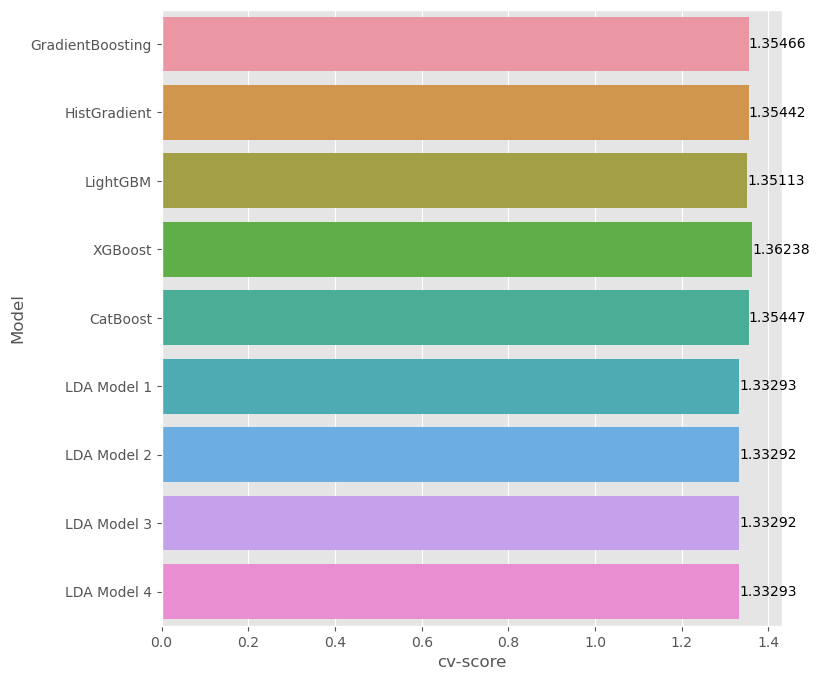

In [22]:
gb_cv_score = np.mean(gb_cv_scores)
hist_cv_score = np.mean(hist_cv_scores)
lgb_cv_score = np.mean(lgb_cv_scores)
xgb_cv_score = np.mean(xgb_cv_scores)
cat_cv_score = np.mean(cat_cv_scores)
ens_cv_score_1 = np.mean(ens_cv_scores_1)
ens_cv_score_2 = np.mean(ens_cv_scores_2)
ens_cv_score_3 = np.mean(ens_cv_scores_3)
ens_cv_score_4 = np.mean(ens_cv_scores_4)

model_perf = pd.DataFrame({'Model': ['GradientBoosting', 'HistGradient' ,'LightGBM', 'XGBoost', 'CatBoost', 
                                     'LDA Model 1',
                                     'LDA Model 2',
                                     'LDA Model 3',
                                     'LDA Model 4'],
                           'cv-score': [gb_cv_score, hist_cv_score, lgb_cv_score, xgb_cv_score, cat_cv_score, 
                                        ens_cv_score_1,
                                        ens_cv_score_2,
                                        ens_cv_score_3,
                                        ens_cv_score_4]})

plt.figure(figsize = (8, 8))
ax = sns.barplot(y = 'Model', x = 'cv-score', data = model_perf)
ax.bar_label(ax.containers[0]);

In [23]:
ens_preds_test_1 = pd.DataFrame(ens_preds_1).apply(np.mean, axis = 0)
ens_preds_test_2 = pd.DataFrame(ens_preds_2).apply(np.mean, axis = 0)
ens_preds_test_3 = pd.DataFrame(ens_preds_3).apply(np.mean, axis = 0)
ens_preds_test_4 = pd.DataFrame(ens_preds_4).apply(np.mean, axis = 0)

submission['Age'] = round(ens_preds_test_1).astype(int)
submission.to_csv('LAD_Ensemble_model_1.csv', index = False)

submission['Age'] = round(ens_preds_test_2).astype(int)
submission.to_csv('LAD_Ensemble_model_2.csv', index = False)

submission['Age'] = round(ens_preds_test_3).astype(int)
submission.to_csv('LAD_Ensemble_model_3.csv', index = False)

submission['Age'] = round(ens_preds_test_4).astype(int)
submission.to_csv('LAD_Ensemble_model_4.csv', index = False)